# VIZ

In [31]:
0.8/0.033

24.242424242424242

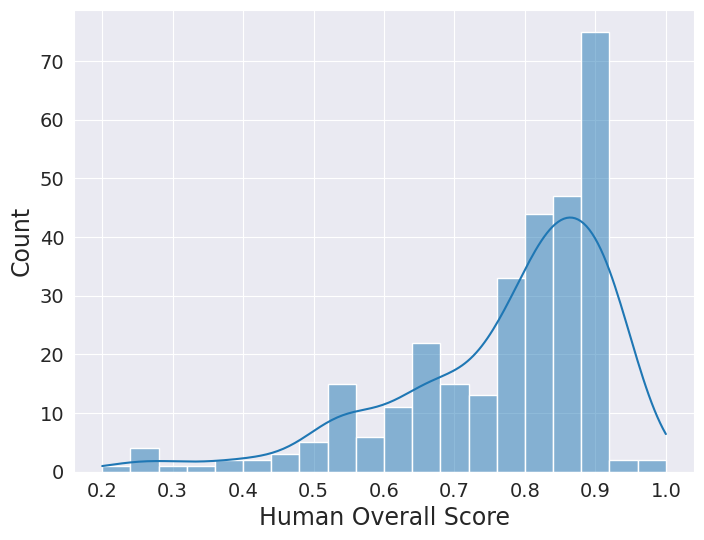

In [57]:
CSV_PATH = 'combined_data.csv'
SIZE = 17

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# sns.set_palette(None)
import pandas as pd

df = pd.read_csv(CSV_PATH)

fig1, ax1 = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='human_overall', bins=20, kde=True, ax=ax1)
ax1.set_xlabel('Human Overall Score', fontsize=SIZE)
ax1.set_ylabel('Count', fontsize=SIZE)
ax1.tick_params(axis='both', which='major', labelsize=SIZE-3)

plt.show()


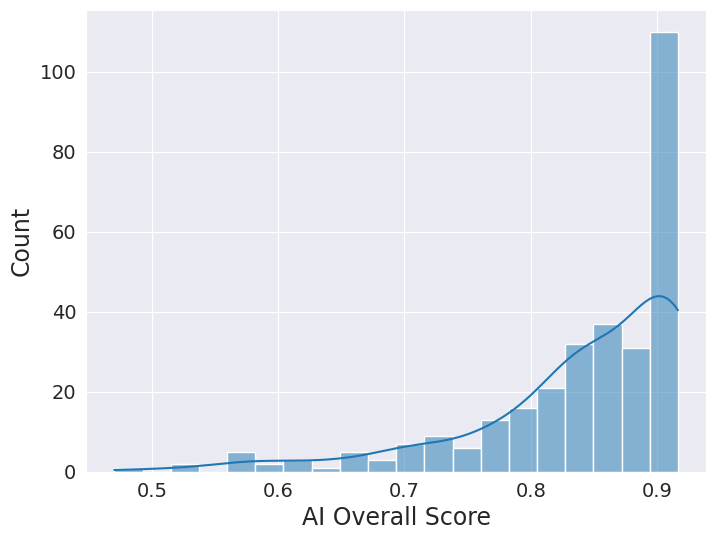

In [58]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='ai_overall', bins=20, kde=True, ax=ax2)
ax2.set_xlabel('AI Overall Score', fontsize=SIZE)
ax2.set_ylabel('Count', fontsize=SIZE)
ax2.tick_params(axis='both', which='major', labelsize=SIZE-3)

plt.show()


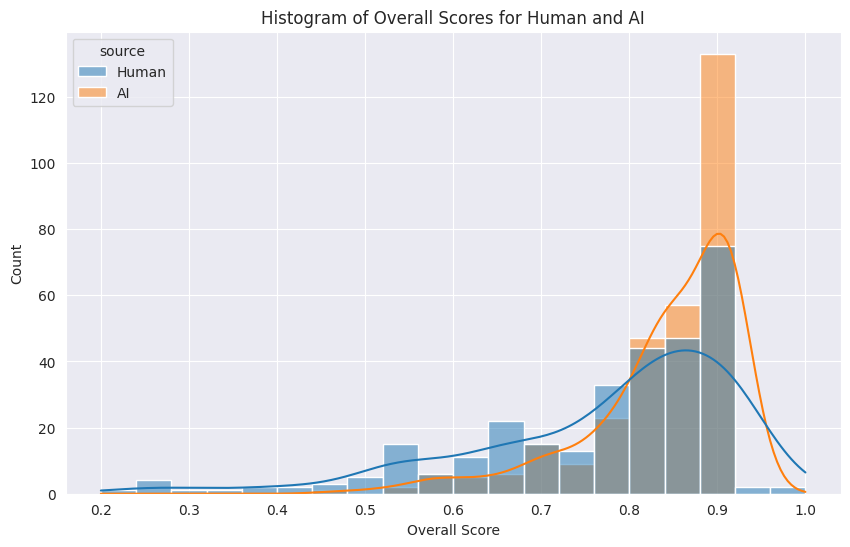

In [33]:
melted_df = pd.melt(df, id_vars=[], value_vars=['human_overall', 'ai_overall'], var_name='source', value_name='overall_score')

# Replace column values for better labeling
melted_df['source'] = melted_df['source'].replace({'human_overall': 'Human', 'ai_overall': 'AI'})

# Create the histogram with dodged bars
plt.figure(figsize=(10, 6))
sns.histplot(data=melted_df, x='overall_score', hue='source', multiple='layer', kde=True, bins=20)

# Set the title and labels
plt.xlabel('Overall Score', fontsize=SIZE)
plt.ylabel('Count', fontsize=SIZE)

# Display the plot
plt.show()

/home/dikka/projs/turboCommitPaper/venv/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


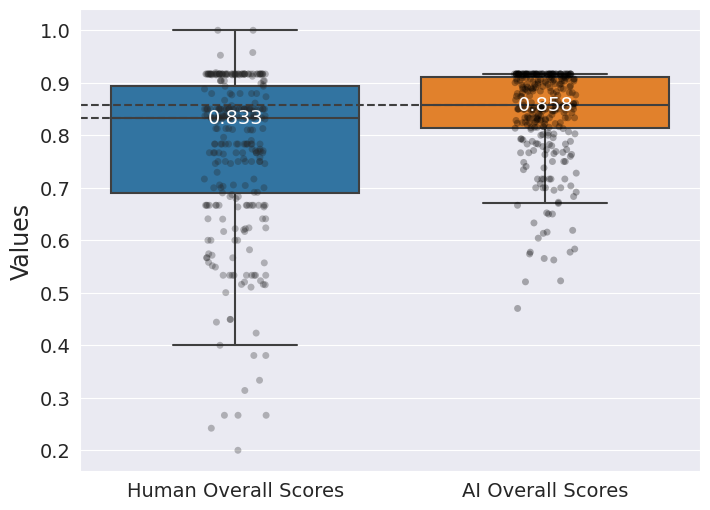

In [51]:
def add_median_labels(ax, fmt='.3f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        ax.axhline(y=y, xmin=0, xmax=1, color=median.get_color(), ls='--', lw=1.5)
        # text with median value at median in the middle of box
        ax.text(x, y, f'{y:{fmt}}', ha='center', va='center', color='white')
        

plt.figure(figsize=(8, 6))
bp = sns.boxplot(data=df[['human_overall', 'ai_overall']], showfliers=False)
bp.set_xticklabels(['Human Overall Scores', 'AI Overall Scores'], fontsize=SIZE)
plt.ylabel('Values', fontsize=SIZE)
sns.stripplot(data=df[['human_overall', 'ai_overall']], color='black', alpha=0.3)

lines = bp.get_lines()
bp.axhline(y=lines[4].get_ydata()[0], xmin=0, xmax=0.25, color=lines[4].get_color(), ls='--')
bp.text(0.0, lines[4].get_ydata()[0], f'{lines[4].get_ydata()[0]:.3f}', ha='center', va='center', color='white',fontsize=SIZE-3)
bp.axhline(y=lines[9].get_ydata()[0], xmin=0, xmax=.75, color=lines[4].get_color(), ls='--')
bp.text(1, lines[9].get_ydata()[0], f'{lines[9].get_ydata()[0]:.3f}', ha='center', va='center', color='white',fontsize=SIZE-3)

plt.tick_params(axis='both', which='major', labelsize=SIZE-3)
plt.show()



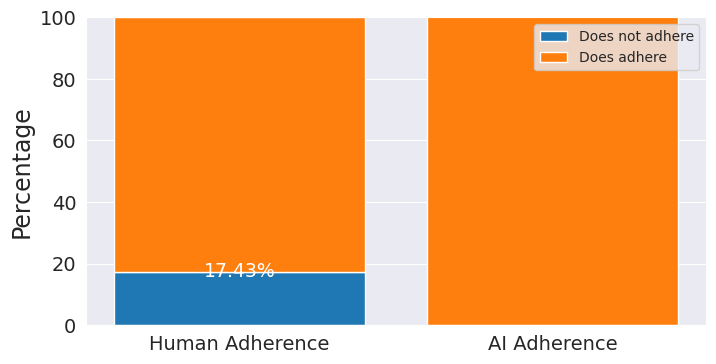

In [48]:
human_adherence_counts = df['human_adherence'].value_counts(normalize=True) * 100
ai_adherence_counts = [0, df['ai_adherence'].count()]

plt.figure(figsize=(8,4))
plt.bar(['Human Adherence', 'AI Adherence'], [human_adherence_counts[0], ai_adherence_counts[0]], label='Does not adhere')
plt.bar(['Human Adherence', 'AI Adherence'], [human_adherence_counts[1], ai_adherence_counts[1]], bottom=[human_adherence_counts[0], ai_adherence_counts[0]], label='Does adhere')
plt.ylabel('Percentage', fontsize=SIZE)
plt.ylim(0, 100)
plt.tick_params(axis='both', which='both', labelsize=SIZE-3)
plt.legend()

# plt.yticks(list(plt.yticks()[0]) + [human_adherence_counts[0]])
plt.text(0, human_adherence_counts[0], f'{human_adherence_counts[0]:.2f}%', ha='center', va='center', color='white', fontsize=SIZE/1.25)

plt.show()


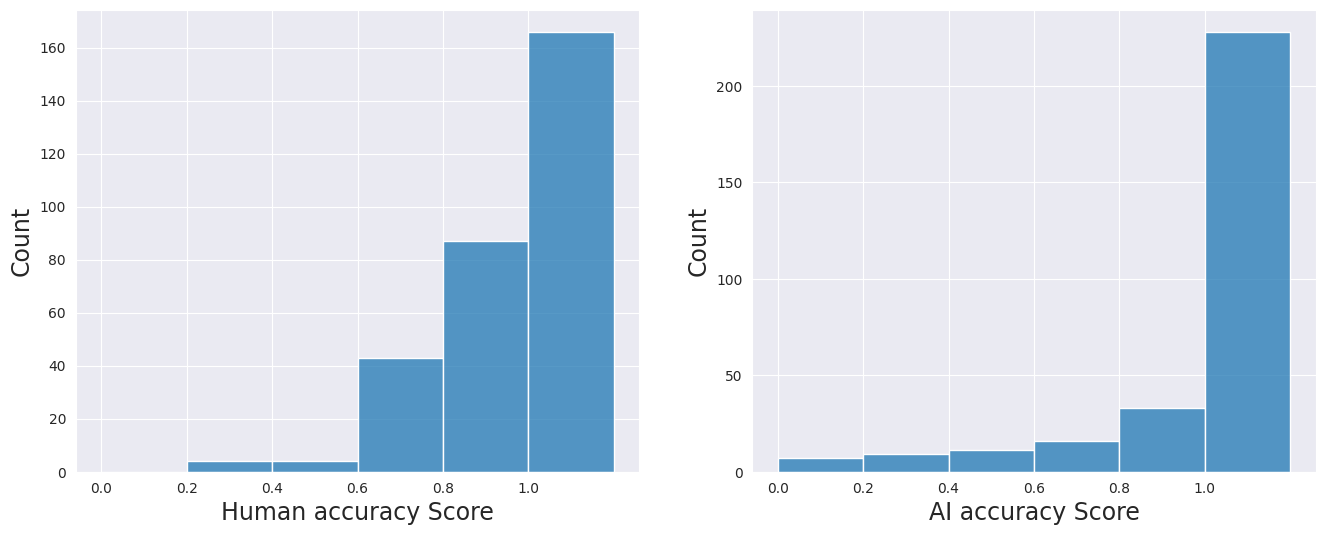

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

xticks = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

sns.histplot(data=df, x='human_accuracy', bins=xticks, kde=False, ax=axs[0])
axs[0].set_xlabel('Human accuracy Score', fontsize=SIZE)
axs[0].set_ylabel('Count', fontsize=SIZE)
axs[0].set_xticks(xticks[:-1])

sns.histplot(data=df, x='ai_accuracy', bins=xticks, kde=False, ax=axs[1])
axs[1].set_xlabel('AI accuracy Score', fontsize=SIZE)
axs[1].set_ylabel('Count', fontsize=SIZE)
axs[1].set_xticks(xticks[:-1])

plt.show()

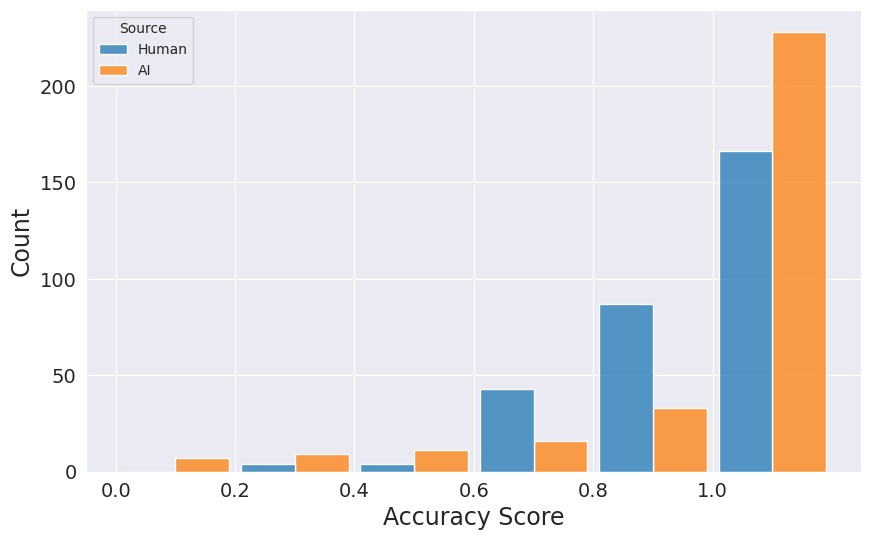

In [37]:
melted_df = pd.melt(df, id_vars=[], value_vars=['human_accuracy', 'ai_accuracy'], var_name='Source', value_name='accuracy_score')

# Replace column values for better labeling
melted_df['Source'] = melted_df['Source'].replace({'human_accuracy': 'Human', 'ai_accuracy': 'AI'})

# Create the histogram with dodged bars
xticks = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
plt.figure(figsize=(10, 6))
sns.histplot(data=melted_df, x='accuracy_score', hue='Source', multiple='dodge', kde=False, bins=xticks, shrink=0.9)

# Set the title and labels
plt.xlabel('Accuracy Score', fontsize=SIZE)
plt.ylabel('Count', fontsize=SIZE)
plt.xticks(xticks[:-1])
plt.tick_params(axis='both', which='both', labelsize=SIZE-3)

# Display the plot
plt.show()

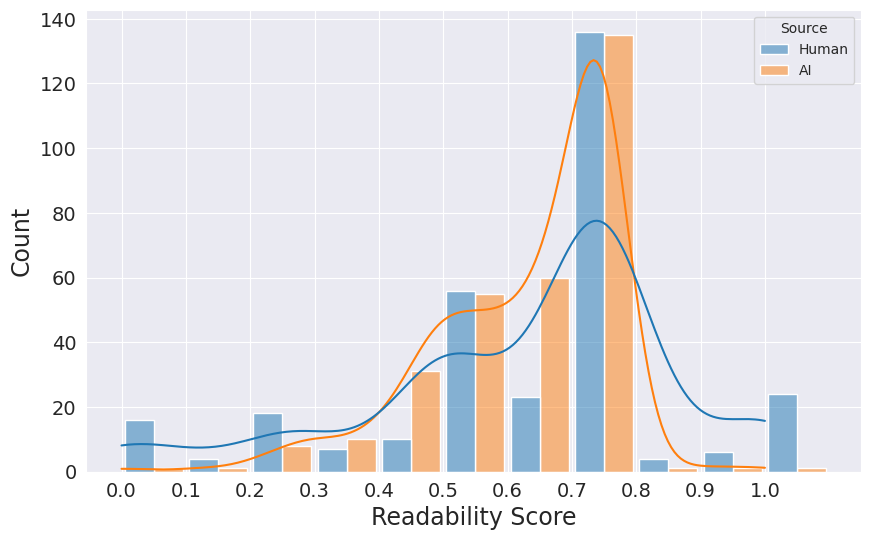

In [45]:
melted_df = pd.melt(df, id_vars=[], value_vars=['human_readability', 'ai_readability'], var_name='Source', value_name='readability_score')

# Replace column values for better labeling
melted_df['Source'] = melted_df['Source'].replace({'human_readability': 'Human', 'ai_readability': 'AI'})

# Create the histogram with dodged bars
xticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, .9, 1, 1.1]
plt.figure(figsize=(10, 6))
sns.histplot(data=melted_df, x='readability_score', hue='Source', multiple='dodge', kde=True, bins=xticks, shrink=0.9)

# Set the title and labels
plt.xlabel('Readability Score', fontsize=SIZE)
plt.ylabel('Count', fontsize=SIZE)
plt.xticks(xticks[:-1])
plt.tick_params(axis='both', which='both', labelsize=SIZE-3)

# Display the plot
plt.show()

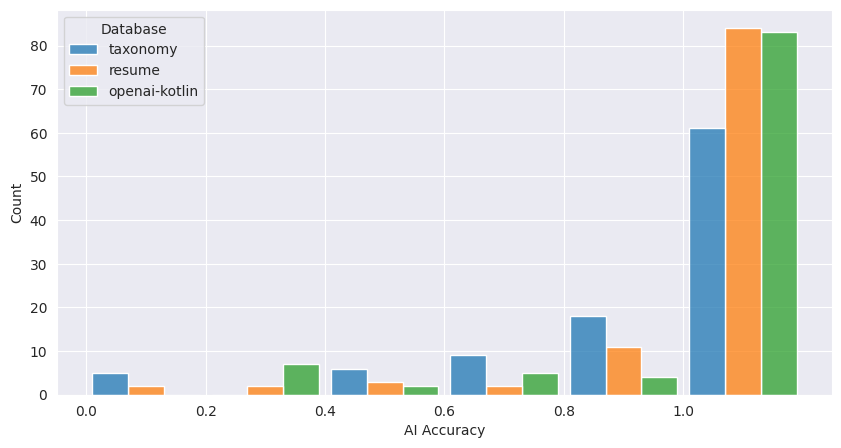

In [53]:
aug = df.copy()

# Extract the database names from the hash column
aug['Database'] = aug['hash'].apply(lambda x: x.split('_')[-1].split('.')[0])

xticks = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

plt.figure(figsize=(10, 5))
ax = sns.histplot(data=aug, x='ai_accuracy', hue='Database', kde=False, bins=xticks, multiple='dodge', shrink=0.9)
plt.xlabel('AI Accuracy')
plt.ylabel('Count')
plt.xticks(xticks[:-1])
plt.show()
